# Feature Engineering

### Agenda
What is and why we are doing feature engineering
1. Imputation
2. Categorical encoding
3. Discretization (or Binning)
4. Scaling
5. Creating features

BONUS: check out the code from `sklear` at the end of each section 

## Introduction

What is our goal when we train a machine learning model?

<img src = "images/basic_model.png">

### Improving accuracy

How do we improve the accuracy (or any other metric) of our predictions?

Selecting the right model makes a difference, but it can only get you so far. What else can we do to teach our model to generate accurate predictions?

Think about how the model learns.

Given X_train input, the algorithm will figure out what weights and coefficients will make the output match the y_train values it's been given.

We need to help if we want to go from an okay model to a good one.

So, what can we do?

## What is Feature Engineering?

The diagram above is over-simplified. If we just feed our algorithm all of the raw data, the model will be just as raw and messy. Instead, we need to clean it up and make some creative decisions to pick the key __features__ that will help the model understand what it needs to know to accurately predict the outcome.

<img src = "images/feature_eng.png">

Some aspects of feature engineering are methodical and consistent. We'll look at these first. 

The others are more of an art, and require us to use our knowledge of the topic a bit of human intuition.

The process of feature engineering can be one of the most time-consuming parts of modeling, but without it your model will be unable to find the patterns for all the noise.

**Estimated time spent with data organizing**
<img src = "images/Stacked-Chart.svg">

Figure taken from [here](https://www.anaconda.com/state-of-data-science-2020?utm_medium=press&utm_source=anaconda&utm_campaign=sods-2020&utm_content=report).  
Different result can be found [here](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/).

## Feature Engineering Using Pandas

Pandas has a powerful collection of tools that we can use to perform some feature engineering.

### Do You Want to Build a Snowman?

Let's prep some data for a model to predict good days to build a snowman.

<img src = "images/olaf.jpeg">

### 0. Import and explore data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'date' : ['01 Jan', '02 Jan', '03 Jan', '04 Jan', '05 Jan', '06 Jan', '07 Jan', '08 Jan', '09 Jan', '10 Jan', '11 Jan', '12 Jan', '13 Jan', '14 Jan'],
    'day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'temp' : [-3, 5, 0, 7, 3, -1, 1, None, -6, 3, 0, -1, None, -2],
    'lunch' : ['soup', 'sandwich', 'soup', 'burger', 'sandwich', 'soup', 'cereal', 'salad', 'sandwich', 'burger', 'soup', 'cereal', 'burger', 'soup'],
    'dinner' : ['pizza', 'pizza', 'noodles', None, 'fishsticks', 'pizza', None, 'fishsticks', 'noodles', 'pizza', None, 'pizza', 'fishsticks', 'pizza'],
    'precipitation' : ['yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no'],
    'struck by ice magic' : ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
    'good day to build a snowman' : ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes']
})

df

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.0,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.0,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.0,soup,noodles,yes,no,yes
3,04 Jan,Thursday,7.0,burger,None,yes,no,no
4,05 Jan,Friday,3.0,sandwich,fishsticks,yes,no,no
5,06 Jan,Saturday,-1.0,soup,pizza,yes,no,yes
6,07 Jan,Sunday,1.0,cereal,None,no,no,yes
7,08 Jan,Monday,NaN,salad,fishsticks,yes,no,yes
8,09 Jan,Tuesday,-6.0,sandwich,noodles,yes,no,yes
9,10 Jan,Wednesday,3.0,burger,pizza,no,no,no


In [2]:
df.head()

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.0,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.0,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.0,soup,noodles,yes,no,yes
3,04 Jan,Thursday,7.0,burger,None,yes,no,no
4,05 Jan,Friday,3.0,sandwich,fishsticks,yes,no,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         14 non-null     object 
 1   day                          14 non-null     object 
 2   temp                         12 non-null     float64
 3   lunch                        14 non-null     object 
 4   dinner                       11 non-null     object 
 5   precipitation                14 non-null     object 
 6   struck by ice magic          14 non-null     object 
 7   good day to build a snowman  14 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.0+ KB


### 1. Imputation - Filling in the Blanks

What do we do with missing information? There are a few strategies to choose from.

First, let's take a look at what's missing:

In [4]:
df.isna()

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False
7,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


`isna()`and `isnull()` are identical methods that produce a boolean mask where True is a missing value. If we want to turn this into a useful view, we can filter using these masks.

In [5]:
df[df.isna().any(axis = 1)] #to find the rows with NaN or None in all columns

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
3,04 Jan,Thursday,7.0,burger,None,yes,no,no
6,07 Jan,Sunday,1.0,cereal,None,no,no,yes
7,08 Jan,Monday,NaN,salad,fishsticks,yes,no,yes
10,11 Jan,Thursday,0.0,soup,None,yes,no,yes
12,13 Jan,Saturday,NaN,burger,fishsticks,no,no,yes


In [6]:
df[df['dinner'].isna()] # to find the rows with NaN or None in a specific column

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
3,04 Jan,Thursday,7.0,burger,None,yes,no,no
6,07 Jan,Sunday,1.0,cereal,None,no,no,yes
10,11 Jan,Thursday,0.0,soup,None,yes,no,yes


Or we can use it with Seaborn to make a heatmap:

<Axes: >

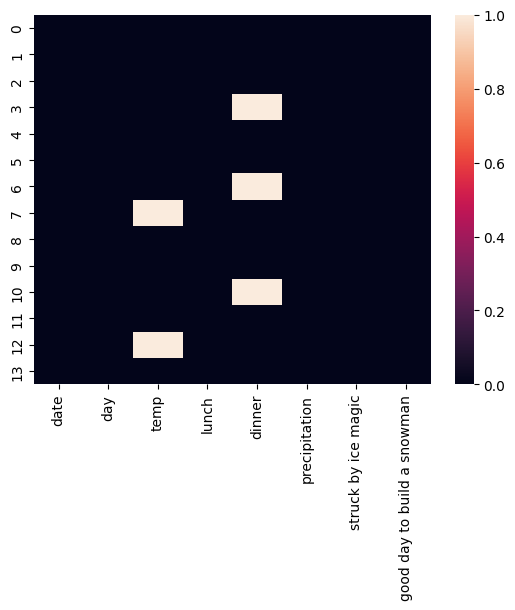

In [7]:
sns.heatmap(df.isna())

So looking at either of these we can see two missing values in temperature and three in the dinner column. How do we deal with them?

In [8]:
df.dropna()

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.0,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.0,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.0,soup,noodles,yes,no,yes
4,05 Jan,Friday,3.0,sandwich,fishsticks,yes,no,no
5,06 Jan,Saturday,-1.0,soup,pizza,yes,no,yes
8,09 Jan,Tuesday,-6.0,sandwich,noodles,yes,no,yes
9,10 Jan,Wednesday,3.0,burger,pizza,no,no,no
11,12 Jan,Friday,-1.0,cereal,pizza,yes,no,yes
13,14 Jan,Sunday,-2.0,soup,pizza,no,no,yes


In [12]:
df.fillna("x")

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.0,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.0,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.0,soup,noodles,yes,no,yes
3,04 Jan,Thursday,7.0,burger,x,yes,no,no
4,05 Jan,Friday,3.0,sandwich,fishsticks,yes,no,no
5,06 Jan,Saturday,-1.0,soup,pizza,yes,no,yes
6,07 Jan,Sunday,1.0,cereal,x,no,no,yes
7,08 Jan,Monday,x,salad,fishsticks,yes,no,yes
8,09 Jan,Tuesday,-6.0,sandwich,noodles,yes,no,yes
9,10 Jan,Wednesday,3.0,burger,pizza,no,no,no


In [15]:
df.fillna(method = 'bfill') # or ffill  # if you like add 'inplace=True'

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.0,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.0,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.0,soup,noodles,yes,no,yes
3,04 Jan,Thursday,7.0,burger,fishsticks,yes,no,no
4,05 Jan,Friday,3.0,sandwich,fishsticks,yes,no,no
5,06 Jan,Saturday,-1.0,soup,pizza,yes,no,yes
6,07 Jan,Sunday,1.0,cereal,fishsticks,no,no,yes
7,08 Jan,Monday,-6.0,salad,fishsticks,yes,no,yes
8,09 Jan,Tuesday,-6.0,sandwich,noodles,yes,no,yes
9,10 Jan,Wednesday,3.0,burger,pizza,no,no,no


In [18]:
df['temp'].fillna(df['temp'].mean()) # or .median() # or .mode() for categorical data

0    -3.0
1     5.0
2     0.0
3     7.0
4     3.0
5    -1.0
6     1.0
7     0.5
8    -6.0
9     3.0
10    0.0
11   -1.0
12    0.5
13   -2.0
Name: temp, dtype: float64

In [17]:
df

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.0,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.0,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.0,soup,noodles,yes,no,yes
3,04 Jan,Thursday,7.0,burger,None,yes,no,no
4,05 Jan,Friday,3.0,sandwich,fishsticks,yes,no,no
5,06 Jan,Saturday,-1.0,soup,pizza,yes,no,yes
6,07 Jan,Sunday,1.0,cereal,None,no,no,yes
7,08 Jan,Monday,NaN,salad,fishsticks,yes,no,yes
8,09 Jan,Tuesday,-6.0,sandwich,noodles,yes,no,yes
9,10 Jan,Wednesday,3.0,burger,pizza,no,no,no


In [16]:
df['temp'].interpolate()

0    -3.0
1     5.0
2     0.0
3     7.0
4     3.0
5    -1.0
6     1.0
7    -2.5
8    -6.0
9     3.0
10    0.0
11   -1.0
12   -1.5
13   -2.0
Name: temp, dtype: float64

In [19]:
df['temp'].fillna(df.groupby(['precipitation'])['temp'].transform('mean'), inplace = True)

In [20]:
df.head()

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.0,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.0,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.0,soup,noodles,yes,no,yes
3,04 Jan,Thursday,7.0,burger,None,yes,no,no
4,05 Jan,Friday,3.0,sandwich,fishsticks,yes,no,no


In [23]:
df['dinner'].fillna(df['dinner'].mode(), inplace = True)

In [29]:
df['dinner'].mode()

0    pizza
Name: dinner, dtype: object

In [24]:
df['lunch'].mode()

0    soup
Name: lunch, dtype: object

#### Imputation Summary

`isna()` or `isnull()` to find missing values as a boolean mask.

`sns.heatmap(df.isna())` to heatmap the missing values.

`df[df.isna().any(axis = 1)]` to show the rows with missing values in any column.

`df[df['col'].isna()]` to show the rows with missing values in a specific column ('col').

`dropna()` to drop any rows with missing values.

`fillna()` to fill missing values. Several options of how:
 * provide a value in the parentheses
 * specify a descriptive attribute of the population (i.e. - `df['col'].mean()`)
 * `ffill()` to use the previous value
 * `bfill()` to use the following value
 * `interpolate()` to use the mean of the previous and following values
 
`inplace = True` to save your changes in the dataframe

Categorical Data - missing values typically filled with the `mode()[0]`

Numerical Data - missing values typically filled with the `mean()`

**Imputation with** ***sklearn***

```python
from sklearn.impute import SimpleImputer
```
Check out [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) for an example.

### 2. Categorical Encoding - Replacing Categories with Numbers

Most algorithms aren't capable of handling strings, but there are some helpful tools to convert them into integers.

#### Factorize - All in One Column
Better for ordinal variables: the numbers should reflect the order of the variables

In [30]:
df

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman
0,01 Jan,Monday,-3.000,soup,pizza,yes,no,yes
1,02 Jan,Tuesday,5.000,sandwich,pizza,no,no,no
2,03 Jan,Wednesday,0.000,soup,noodles,yes,no,yes
3,04 Jan,Thursday,7.000,burger,pizza,yes,no,no
4,05 Jan,Friday,3.000,sandwich,fishsticks,yes,no,no
5,06 Jan,Saturday,-1.000,soup,pizza,yes,no,yes
6,07 Jan,Sunday,1.000,cereal,pizza,no,no,yes
7,08 Jan,Monday,-0.125,salad,fishsticks,yes,no,yes
8,09 Jan,Tuesday,-6.000,sandwich,noodles,yes,no,yes
9,10 Jan,Wednesday,3.000,burger,pizza,no,no,no


In [31]:
df['lunch'].value_counts()

soup        5
sandwich    3
burger      3
cereal      2
salad       1
Name: lunch, dtype: int64

In [32]:
df['lunch'].unique()

array(['soup', 'sandwich', 'burger', 'cereal', 'salad'], dtype=object)

In [33]:
df['lunch'].nunique()

5

In [34]:
pd.factorize(df['lunch'])

(array([0, 1, 0, 2, 1, 0, 3, 4, 1, 2, 0, 3, 2, 0]),
 Index(['soup', 'sandwich', 'burger', 'cereal', 'salad'], dtype='object'))

In [35]:
dinner_labels = pd.factorize(df['lunch'])[1]
lunch_factorized = pd.factorize(df['lunch'])[0]

lunch_factorized

array([0, 1, 0, 2, 1, 0, 3, 4, 1, 2, 0, 3, 2, 0])

In [36]:
dinner_labels

Index(['soup', 'sandwich', 'burger', 'cereal', 'salad'], dtype='object')

#### Get Dummies - One Column per Variable
Better for categorical variables 

In [40]:
pd.get_dummies(df['lunch']) #, drop_first=True)

,cereal,salad,sandwich,soup
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,0,0
4,0,0,1,0
5,0,0,0,1
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,0,0


In [41]:
df = df.join(pd.get_dummies(df['lunch'], drop_first = True))
df

,date,day,temp,lunch,dinner,precipitation,struck by ice magic,good day to build a snowman,cereal,salad,sandwich,soup
0,01 Jan,Monday,-3.000,soup,pizza,yes,no,yes,0,0,0,1
1,02 Jan,Tuesday,5.000,sandwich,pizza,no,no,no,0,0,1,0
2,03 Jan,Wednesday,0.000,soup,noodles,yes,no,yes,0,0,0,1
3,04 Jan,Thursday,7.000,burger,pizza,yes,no,no,0,0,0,0
4,05 Jan,Friday,3.000,sandwich,fishsticks,yes,no,no,0,0,1,0
5,06 Jan,Saturday,-1.000,soup,pizza,yes,no,yes,0,0,0,1
6,07 Jan,Sunday,1.000,cereal,pizza,no,no,yes,1,0,0,0
7,08 Jan,Monday,-0.125,salad,fishsticks,yes,no,yes,0,1,0,0
8,09 Jan,Tuesday,-6.000,sandwich,noodles,yes,no,yes,0,0,1,0
9,10 Jan,Wednesday,3.000,burger,pizza,no,no,no,0,0,0,0


In [42]:
df.drop(['lunch', 'struck by ice magic'], axis = 1, inplace = True)
df

,date,day,temp,dinner,precipitation,good day to build a snowman,cereal,salad,sandwich,soup
0,01 Jan,Monday,-3.000,pizza,yes,yes,0,0,0,1
1,02 Jan,Tuesday,5.000,pizza,no,no,0,0,1,0
2,03 Jan,Wednesday,0.000,noodles,yes,yes,0,0,0,1
3,04 Jan,Thursday,7.000,pizza,yes,no,0,0,0,0
4,05 Jan,Friday,3.000,fishsticks,yes,no,0,0,1,0
5,06 Jan,Saturday,-1.000,pizza,yes,yes,0,0,0,1
6,07 Jan,Sunday,1.000,pizza,no,yes,1,0,0,0
7,08 Jan,Monday,-0.125,fishsticks,yes,yes,0,1,0,0
8,09 Jan,Tuesday,-6.000,noodles,yes,yes,0,0,1,0
9,10 Jan,Wednesday,3.000,pizza,no,no,0,0,0,0


#### Summary

`factorize()` and `get_dummies()` turn categorical data into an integer

`factorize()` results in a single column

`get_dummies()` results in multiple columns

When joining to your df, `drop_first` removes a column from your dummy frame to avoid **perfect collinearity**, especially when using a regression model. There is some discussion of why multicollinearity is <a href = "https://towardsdatascience.com/multicollinearity-why-is-it-bad-5335030651bf">a problem</a> and <a href = "https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn">why it might not be that bad</a>. The arguments are interesting, but as a general rule, when using regression models it's best to avoid it.

**Encoding with** ***sklearn***

```python
from sklearn.preprocessing import OneHotEncoder
```
Check out [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for an example.
- `factorize()` similar to `LabelEncoder` in scikit-learn
- `get_dummies()` similar to `OneHotEncoder` in scikit-learn

### 3. Discretization (Binning) - Splitting scalars into categories

By breaking a set of values into fewer chunks, you can avoid overfitting at the cost of some granularity.

Let's look at the distribution of temperatures in our snowman set:

<Axes: >

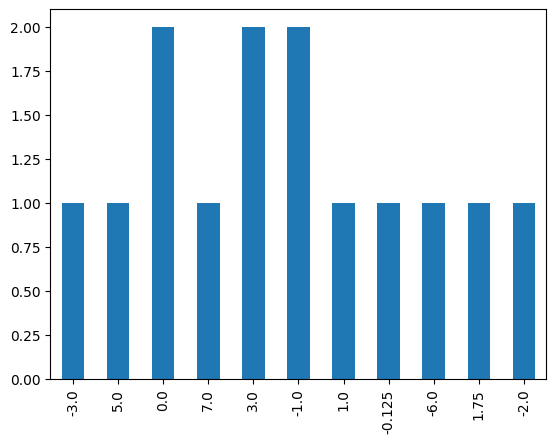

In [43]:
df['temp'].value_counts(sort = False).plot.bar()

#### Interval-based Binning

`pd.cut()` will divide the range of values into bins of equal **width**.

In [44]:
pd.cut(df['temp'], bins = 3)

0     (-6.013, -1.667]
1         (2.667, 7.0]
2      (-1.667, 2.667]
3         (2.667, 7.0]
4         (2.667, 7.0]
5      (-1.667, 2.667]
6      (-1.667, 2.667]
7      (-1.667, 2.667]
8     (-6.013, -1.667]
9         (2.667, 7.0]
10     (-1.667, 2.667]
11     (-1.667, 2.667]
12     (-1.667, 2.667]
13    (-6.013, -1.667]
Name: temp, dtype: category
Categories (3, interval[float64, right]): [(-6.013, -1.667] < (-1.667, 2.667] < (2.667, 7.0]]

All three of the intervals are the same width (allowing for irregularities in how Python rounds).

Note:
* "(" => Open interval (doesn't include the boundary)
* "]" => Closed interval

<Axes: >

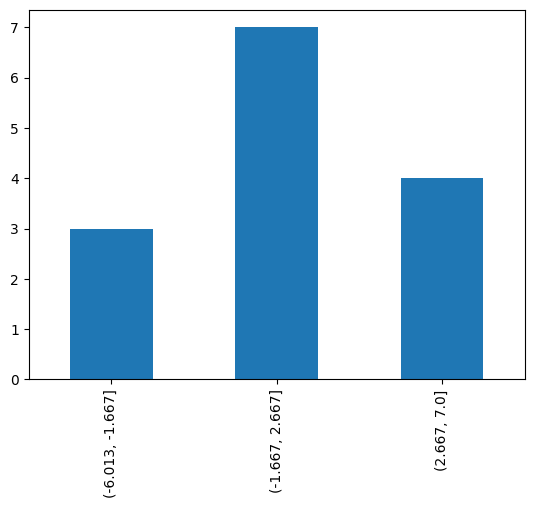

In [45]:
pd.cut(df['temp'], bins = 3).value_counts(sort = False).plot.bar()

You can also add in custom bins:

<Axes: >

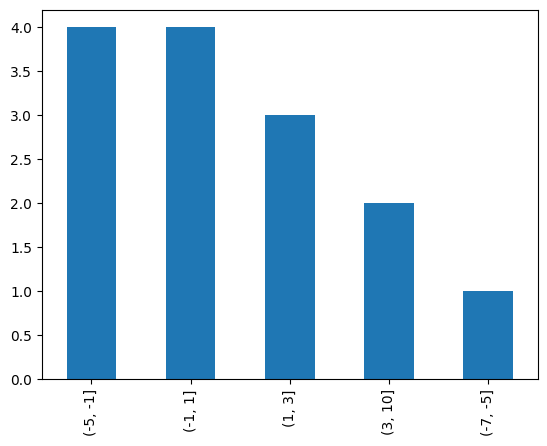

In [46]:
pd.cut(df['temp'], [-7, -5, -1, 1, 3, 10]).value_counts().plot.bar()

### Quantile-based Binning

`pd.qcut()` will divide the range of values, based upon quantile, into bins of equal **population**.

In [47]:
pd.qcut(df['temp'], q = 3)

0     (-6.001, -0.708]
1           (1.5, 7.0]
2        (-0.708, 1.5]
3           (1.5, 7.0]
4           (1.5, 7.0]
5     (-6.001, -0.708]
6        (-0.708, 1.5]
7        (-0.708, 1.5]
8     (-6.001, -0.708]
9           (1.5, 7.0]
10       (-0.708, 1.5]
11    (-6.001, -0.708]
12          (1.5, 7.0]
13    (-6.001, -0.708]
Name: temp, dtype: category
Categories (3, interval[float64, right]): [(-6.001, -0.708] < (-0.708, 1.5] < (1.5, 7.0]]

<Axes: >

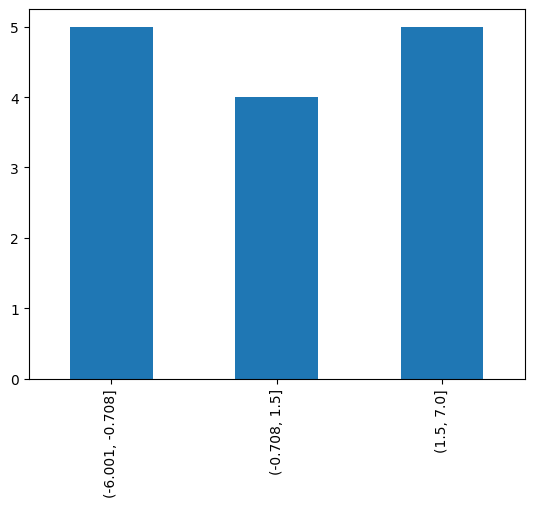

In [48]:
pd.qcut(df['temp'], q = 3).value_counts(sort = False).plot.bar()

The three bins have as close to the same population as you can with 14 available datapoints.

If you want to, you're also able to add in labels to describe the segments for ease of interpretation.

In [49]:
df['temp_cut'] = pd.cut(df['temp'], bins = 3, labels = ['freezing', 'cold', 'cool'])
df['temp_qcut'] = pd.qcut(df['temp'], q = 3, labels = ['freezing', 'cold', 'cool'])
df

,date,day,temp,dinner,precipitation,good day to build a snowman,cereal,salad,sandwich,soup,temp_cut,temp_qcut
0,01 Jan,Monday,-3.000,pizza,yes,yes,0,0,0,1,freezing,freezing
1,02 Jan,Tuesday,5.000,pizza,no,no,0,0,1,0,cool,cool
2,03 Jan,Wednesday,0.000,noodles,yes,yes,0,0,0,1,cold,cold
3,04 Jan,Thursday,7.000,pizza,yes,no,0,0,0,0,cool,cool
4,05 Jan,Friday,3.000,fishsticks,yes,no,0,0,1,0,cool,cool
5,06 Jan,Saturday,-1.000,pizza,yes,yes,0,0,0,1,cold,freezing
6,07 Jan,Sunday,1.000,pizza,no,yes,1,0,0,0,cold,cold
7,08 Jan,Monday,-0.125,fishsticks,yes,yes,0,1,0,0,cold,cold
8,09 Jan,Tuesday,-6.000,noodles,yes,yes,0,0,1,0,freezing,freezing
9,10 Jan,Wednesday,3.000,pizza,no,no,0,0,0,0,cool,cool


At this point you could easily use get_dummies on your new bins.

#### Summary

`pd.cut()` divides into intervals of **equal width**.

`pd.cut()` can use arbitrary boundaries that you specify in lieu of the `bins` argument (i.e. - [0, 5, 10, 25])

`pd.qcut()` divides into intervals of **equal population**. This is of greater use when you have an unevenly or very widely distributed set of values.

**Encoding with** ***sklearn***

```python
from sklearn.preprocessing import KBinsDiscretizer
```
Check out [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) for an example.

## 4. Scaling

Scaling will almost always give you better results.

For example: 

There are two features of dramatically different scale: distance from the earth to the sun in meters (f1) and temperature of the earth in degrees Kelvin (f2).

The range of f1 is [0, 100000000000] and f2 is [-273, 100000]

With this **disparity**, a logarithmic regression will end up focusing almost entirely on f1, with f2 contributing almost nothing to the model.

**If we scale this, then they will equally contribute to the model's learning**, improving our chances of performing well.

### Normalization

`MinMaxScaler()` normalizes data within the range [0,1]:

$$\large \dfrac{x - min(x)}{max(x) - min(x)}$$

Minimum value becomes 0, maximum value become 1, everything in between is proportionally distributed.

Does not handle outliers well.

Useful with models like Support Vector Machines.

<Axes: >

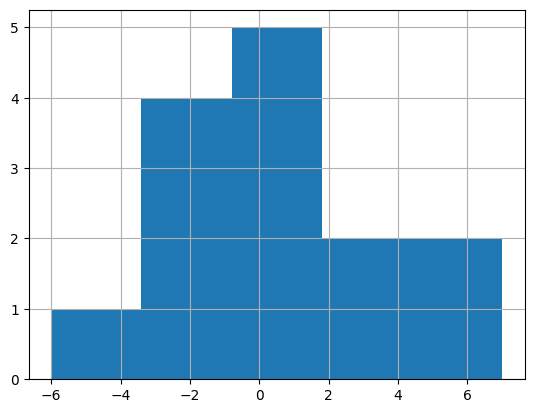

In [50]:
df['temp'].hist(bins=5)

In [51]:
temp_range = df['temp'].max() - df['temp'].min()
temp_range

13.0

<Axes: >

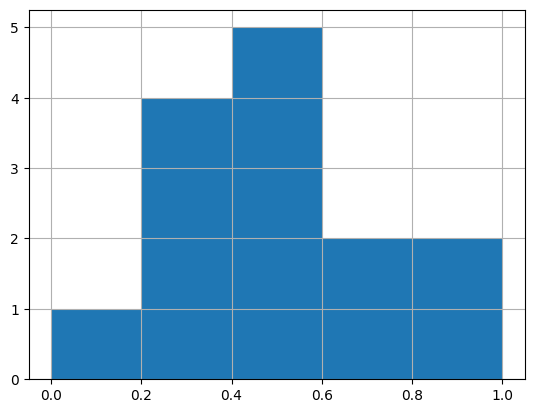

In [52]:
scaled = (df['temp'] - df['temp'].min() ) / temp_range
scaled.hist(bins=5)

### Standardization

`StandardScaler()` scales the datapoints to a distribution with a mean of 0 and a variance of 1.

$$\large \dfrac{x - mean}{sd}$$

Follows a standard normal distribution.

Useful for clustering.

### Robust Scaler

`RobustScaler` is more robust toward outliers.

Similar to `StandardScaler`, except it substracts the median and dividing by the IQR.

$$\large \frac{x - median}{IQR}$$

More robust to outliers

**Scaling with** ***sklearn***

```python
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
```
Check out [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) for examples.

## 5. Creating Features

Sometimes you can derive more meaningful features by transforming existing data. This can be achieved using mathematical operations on a single or multiple features, or by creatively using your knowledge of (or ability to research) the subject matter to great effect.

An example using our snowman dataset above would be a possible combination of cold weather and precipitation to suggest it was snowing, like so:

In [53]:
df

,date,day,temp,dinner,precipitation,good day to build a snowman,cereal,salad,sandwich,soup,temp_cut,temp_qcut
0,01 Jan,Monday,-3.000,pizza,yes,yes,0,0,0,1,freezing,freezing
1,02 Jan,Tuesday,5.000,pizza,no,no,0,0,1,0,cool,cool
2,03 Jan,Wednesday,0.000,noodles,yes,yes,0,0,0,1,cold,cold
3,04 Jan,Thursday,7.000,pizza,yes,no,0,0,0,0,cool,cool
4,05 Jan,Friday,3.000,fishsticks,yes,no,0,0,1,0,cool,cool
5,06 Jan,Saturday,-1.000,pizza,yes,yes,0,0,0,1,cold,freezing
6,07 Jan,Sunday,1.000,pizza,no,yes,1,0,0,0,cold,cold
7,08 Jan,Monday,-0.125,fishsticks,yes,yes,0,1,0,0,cold,cold
8,09 Jan,Tuesday,-6.000,noodles,yes,yes,0,0,1,0,freezing,freezing
9,10 Jan,Wednesday,3.000,pizza,no,no,0,0,0,0,cool,cool


In [54]:
df['snow_likely'] = "no"
df.loc[(df['temp'] < 1.0) & (df['precipitation'] == "yes"), 'snow_likely'] = "yes"
df

,date,day,temp,dinner,precipitation,good day to build a snowman,cereal,salad,sandwich,soup,temp_cut,temp_qcut,snow_likely
0,01 Jan,Monday,-3.000,pizza,yes,yes,0,0,0,1,freezing,freezing,yes
1,02 Jan,Tuesday,5.000,pizza,no,no,0,0,1,0,cool,cool,no
2,03 Jan,Wednesday,0.000,noodles,yes,yes,0,0,0,1,cold,cold,yes
3,04 Jan,Thursday,7.000,pizza,yes,no,0,0,0,0,cool,cool,no
4,05 Jan,Friday,3.000,fishsticks,yes,no,0,0,1,0,cool,cool,no
5,06 Jan,Saturday,-1.000,pizza,yes,yes,0,0,0,1,cold,freezing,yes
6,07 Jan,Sunday,1.000,pizza,no,yes,1,0,0,0,cold,cold,no
7,08 Jan,Monday,-0.125,fishsticks,yes,yes,0,1,0,0,cold,cold,yes
8,09 Jan,Tuesday,-6.000,noodles,yes,yes,0,0,1,0,freezing,freezing,yes
9,10 Jan,Wednesday,3.000,pizza,no,no,0,0,0,0,cool,cool,no


In [55]:
df.columns

Index(['date', 'day', 'temp', 'dinner', 'precipitation',
       'good day to build a snowman', 'cereal', 'salad', 'sandwich', 'soup',
       'temp_cut', 'temp_qcut', 'snow_likely'],
      dtype='object')

Depending on your dataset, this new feature may be more meaningful to your model than the two features that created it.

### BONUS: General approach when using sklearn for **feature engineering**  

1. Split the data (X and y) into train and test portions.<br><br>  

2. instanciate e.g. a scaler: `scaler = MinMaxScaler()`<br><br>  

3. fit on the *train* data, e.g. `scaler.fit(X_train)` (e.g. for range calculation)  
&nbsp; **Don't fit on the test data.**<br><br>  

4. transform (e.g. scale, in general: engineer) train **and** test data: `scaler.transform(X_t...)`  
&nbsp; The *test* data is only transformed (based on the fitted *train* data).

&nbsp; Realize the parallelism to ML with sklearn:  

| |step| ML | FE |
|-| - | - | - |
|1.| split data | &rightarrow; | train_test_split(X,y) |
|2.| instanciate | model = LogisticRegression() | scaler = MinMaxScaler() |
|3.| fit to the data | model.fit(X_train, y_train) | scaler.fit(X_train) |
|4.| usage (e.g.) | model.predict(X_test) | model.transform(X_test) |

&emsp; hint: When you see `.fit_transform(X)`: This fits and transforms in one go (only sensible for X_train).

## Summary

- Motivation why to engineer features
- Estimated time consumption (invest here saves time later)
- Imputation (handel missing values)
- One-hot-encoding (for case discrimination)
- Binning (grouping)
- Scaling (for getting similar ranges among different features)
- pointer to sklearn which can handle all this as well

## Broad indications for a data science project

Read data
Split to train and test.  
EDA (mainly statistic/visualization).  
Fill (or drop) NAs.  
Drop or one-hot-encode categorical columns.  
Drop unnecessary columns.  
Feature engineering (binning, scaling).  
Create baseline model (dummy classifier).   
    - model.fit(x_train,y_train)  
    - model.predict(x_train)  
    - model.predict(x_test)  
    - model.score(x_train, y_train)  
    - model.score(x_test, y_test)  
Create proper model (logistic regression).  
    with same modelling steps, eventually tune the hyperparameters with GridSearch.  
Evaluate the model (confusion matrix, train-test score comparison).